In [1]:
##Stock Analysis with Scikit-Learn/Pandas

In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 12, 31)

#Extract Apple Stock Prices from 2019
df = web.DataReader("ZM", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,384.880005,375.000000,383.880005,375.170013,3850700,375.170013
2020-12-28,373.279999,349.019989,370.399994,351.390015,9454800,351.390015
2020-12-29,359.907013,350.130005,350.660004,353.750000,6080300,353.750000
2020-12-30,358.700012,345.399994,358.420013,353.399994,5474500,353.399994
2020-12-31,351.829987,336.100006,351.769989,337.320007,6559700,337.320007


In [3]:
#Let's Compare Zoom, Peleton. Crowd Strike, DocuSign, and Roku

dfcomp = web.DataReader(['ZM', 'PTON', 'CRWD', 'DOCU', 'ROKU'],'yahoo',start=start,end=end)['Adj Close']
dfcomp

Symbols,ZM,PTON,CRWD,DOCU,ROKU
Date,,,,,
2020-01-02,68.720001,29.740000,49.439999,75.900002,137.100006
2020-01-03,67.279999,30.600000,50.750000,75.559998,137.509995
2020-01-06,70.320000,29.750000,55.110001,75.389999,143.369995
2020-01-07,71.900002,30.400000,54.750000,75.239998,138.190002
2020-01-08,72.550003,29.650000,55.660000,76.269997,134.639999
...,...,...,...,...,...
2020-12-24,375.170013,162.720001,221.119995,244.929993,356.989990
2020-12-28,351.390015,152.179993,212.550003,229.199997,340.410004
2020-12-29,353.750000,150.100006,205.929993,228.160004,339.570007


In [4]:
#Analyze by using percent change and correlation
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
dfcomp = web.DataReader(['ZM', 'PTON', 'CRWD', 'DOCU', 'ROKU'],'yahoo',start=start,end=end)['Adj Close']
dfcomp

Symbols,ZM,PTON,CRWD,DOCU,ROKU
Date,,,,,
2020-01-02,68.720001,29.740000,49.439999,75.900002,137.100006
2020-01-03,67.279999,30.600000,50.750000,75.559998,137.509995
2020-01-06,70.320000,29.750000,55.110001,75.389999,143.369995
2020-01-07,71.900002,30.400000,54.750000,75.239998,138.190002
2020-01-08,72.550003,29.650000,55.660000,76.269997,134.639999
...,...,...,...,...,...
2020-12-24,375.170013,162.720001,221.119995,244.929993,356.989990
2020-12-28,351.390015,152.179993,212.550003,229.199997,340.410004
2020-12-29,353.750000,150.100006,205.929993,228.160004,339.570007


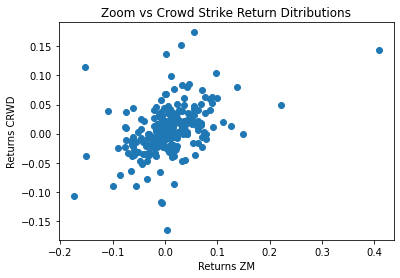

In [5]:
#Scatterplot to show Zoom vs Crowd Strike return distibutions


plt.scatter(retscomp.ZM, retscomp.CRWD)
plt.xlabel('Returns ZM')
plt.ylabel('Returns CRWD')
plt.title('Zoom vs Crowd Strike Return Ditributions')
plt.show()

Text(0.5, 1.0, 'Company Correlation Heat Map')

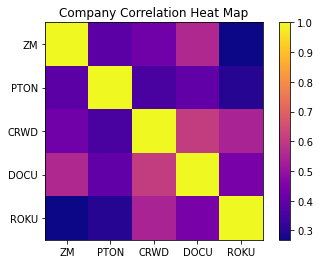

In [6]:
#Heat map to visualize the correlation ranges of all companies

plt.imshow(corr, cmap='plasma', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Company Correlation Heat Map')
